In [75]:
#import dependencies
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [76]:
import numpy as np
import pandas as pd

In [77]:
import datetime as dt
from datetime import datetime
from scipy import stats

# Reflect Tables into SQLAlchemy ORM

In [85]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import create_engine, inspect

In [86]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [87]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables and set true
Base.prepare(engine, reflect=True)

In [88]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [89]:
# Save references of classes to each table
# Assign classes to a variable name of table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [90]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [96]:
inspector = inspect(engine)

In [97]:
#To see all of the columns
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


# Exploratory Climate Analysis

In [61]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results descending (desc)
# Select only the `date` and `prcp` values.
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(last_date)


('2017-08-23',)


In [98]:
# Calculate the date 1 year ago from the last data point in the database
query_date = dt.date(2017,8,23) - dt.timedelta(days=365)
print('Query Date :', query_date)

Query Date : 2016-08-23


In [65]:
# Perform a query to retrieve the data and precipitation scores
data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= query_date).all()
for record in data:
    print(record)


('2016-08-23', 0.0)
('2016-08-24', 0.08)
('2016-08-25', 0.08)
('2016-08-26', 0.0)
('2016-08-27', 0.0)
('2016-08-28', 0.01)
('2016-08-29', 0.0)
('2016-08-30', 0.0)
('2016-08-31', 0.13)
('2016-09-01', 0.0)
('2016-09-02', 0.0)
('2016-09-03', 0.0)
('2016-09-04', 0.03)
('2016-09-05', None)
('2016-09-06', None)
('2016-09-07', 0.05)
('2016-09-08', 0.0)
('2016-09-09', 0.03)
('2016-09-10', 0.0)
('2016-09-11', 0.05)
('2016-09-12', 0.0)
('2016-09-13', 0.02)
('2016-09-14', 1.32)
('2016-09-15', 0.42)
('2016-09-16', 0.06)
('2016-09-17', 0.05)
('2016-09-18', 0.0)
('2016-09-19', 0.0)
('2016-09-20', 0.0)
('2016-09-21', 0.0)
('2016-09-22', 0.02)
('2016-09-23', 0.0)
('2016-09-24', 0.0)
('2016-09-25', 0.0)
('2016-09-26', 0.06)
('2016-09-27', 0.02)
('2016-09-28', 0.0)
('2016-09-29', 0.0)
('2016-09-30', 0.0)
('2016-10-01', 0.0)
('2016-10-02', 0.0)
('2016-10-03', 0.0)
('2016-10-04', 0.0)
('2016-10-05', 0.0)
('2016-10-06', 0.0)
('2016-10-07', 0.0)
('2016-10-08', 0.0)
('2016-10-09', 0.0)
('2016-10-10', 0.0)
('

('2016-10-14', 0.0)
('2016-10-15', 0.04)
('2016-10-16', 0.0)
('2016-10-17', 0.01)
('2016-10-18', 0.02)
('2016-10-19', 0.11)
('2016-10-20', 0.0)
('2016-10-21', 0.0)
('2016-10-22', 0.15)
('2016-10-23', 0.02)
('2016-10-24', 0.08)
('2016-10-25', 0.11)
('2016-10-26', 0.01)
('2016-10-27', 0.22)
('2016-10-28', 0.05)
('2016-10-29', 0.1)
('2016-10-30', 0.16)
('2016-10-31', 0.07)
('2016-11-01', 0.1)
('2016-11-02', 0.0)
('2016-11-03', 0.0)
('2016-11-04', 0.0)
('2016-11-05', 0.03)
('2016-11-06', 0.01)
('2016-11-07', 0.0)
('2016-11-08', 0.21)
('2016-11-09', 0.11)
('2016-11-10', 0.0)
('2016-11-11', 0.0)
('2016-11-12', 0.0)
('2016-11-13', 0.0)
('2016-11-14', 0.0)
('2016-11-15', 0.0)
('2016-11-16', 0.24)
('2016-11-17', 0.01)
('2016-11-18', 0.0)
('2016-11-19', 0.11)
('2016-11-20', 0.39)
('2016-11-21', 0.11)
('2016-11-22', 2.05)
('2016-11-23', 0.25)
('2016-11-24', 0.3)
('2016-11-25', 0.08)
('2016-11-26', 0.06)
('2016-11-27', 0.17)
('2016-11-28', 0.0)
('2016-11-29', 0.09)
('2016-11-30', 0.05)
('2016-12-0

In [66]:
# Save the query results as a Pandas DataFrame and set the index to the date column
climate_df = pd.DataFrame(data, columns = ["date", "prcp"])
climate_df.set_index("date", inplace=True)

# Sort the dataframe by date
climate_df = climate_df.sort_values(["date"])
climate_df.head(10)



,prcp
date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
2016-08-23,0.70
2016-08-23,0.02
2016-08-24,0.08
2016-08-24,2.15


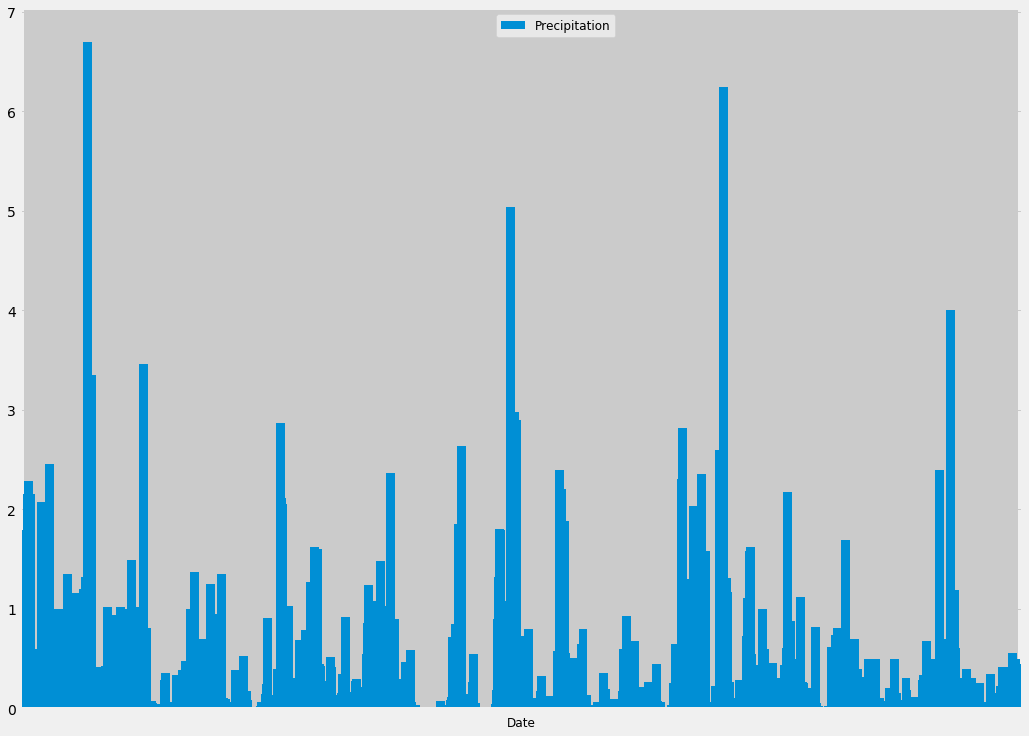

In [104]:
# Use Pandas Plotting with Matplotlib to plot the data
ax = climate_df.plot.bar(figsize=(16,12), width=20)
ax.set_xlabel("Date", fontsize=12)
ax.set_xticklabels([])
plt.legend(['Precipitation'], fontsize=12)
ax.get_legend().set_bbox_to_anchor((0.6, 1))

plt.show()

In [106]:
# Use Pandas to calcualte the summary statistics for the precipitation data
statistics = climate_df["prcp"].describe()
statistics_df = pd.DataFrame(statistics)
statistics_df.rename(columns = {"prcp": "precipitation"})

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [107]:
# Design a query to show how many stations are available in this dataset?
session.query(Station).group_by(Station.station).count()

9

In [110]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.date)).group_by(Measurement.station).\
    order_by(func.count(Measurement.date).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [111]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?


# Identify the most active station
most_active_station=session.query(Measurement.station).group_by(Measurement.station).\
    order_by(func.count(Measurement.date).desc()).first()
most_active= most_active_station[0]
most_active

'USC00519281'

In [112]:
# Calculate the lowest temperature recorded, highest temperature recorded, 
# and average temperature of the most active station?
session.query(Measurement.station, func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station==most_active).all()

[('USC00519281', 54.0, 85.0, 71.66378066378067)]

In [115]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_data=session.query(Measurement.tobs).filter(Measurement.station==most_active).\
    filter(Measurement.date>=query_date).all()
temp_data

[(77.0),
 (77.0),
 (80.0),
 (80.0),
 (75.0),
 (73.0),
 (78.0),
 (77.0),
 (78.0),
 (80.0),
 (80.0),
 (78.0),
 (78.0),
 (78.0),
 (73.0),
 (74.0),
 (80.0),
 (79.0),
 (77.0),
 (80.0),
 (76.0),
 (79.0),
 (75.0),
 (79.0),
 (78.0),
 (79.0),
 (78.0),
 (78.0),
 (76.0),
 (74.0),
 (77.0),
 (78.0),
 (79.0),
 (79.0),
 (77.0),
 (80.0),
 (78.0),
 (78.0),
 (78.0),
 (77.0),
 (79.0),
 (79.0),
 (79.0),
 (79.0),
 (75.0),
 (76.0),
 (73.0),
 (72.0),
 (71.0),
 (77.0),
 (79.0),
 (78.0),
 (79.0),
 (77.0),
 (79.0),
 (77.0),
 (78.0),
 (78.0),
 (78.0),
 (78.0),
 (77.0),
 (74.0),
 (75.0),
 (76.0),
 (73.0),
 (76.0),
 (74.0),
 (77.0),
 (76.0),
 (76.0),
 (74.0),
 (75.0),
 (75.0),
 (75.0),
 (75.0),
 (71.0),
 (63.0),
 (70.0),
 (68.0),
 (67.0),
 (77.0),
 (74.0),
 (77.0),
 (76.0),
 (76.0),
 (75.0),
 (76.0),
 (75.0),
 (73.0),
 (75.0),
 (73.0),
 (75.0),
 (74.0),
 (75.0),
 (74.0),
 (75.0),
 (73.0),
 (75.0),
 (73.0),
 (73.0),
 (74.0),
 (70.0),
 (72.0),
 (70.0),
 (67.0),
 (67.0),
 (69.0),
 (70.0),
 (68.0),
 (69.0),
 (69.0),
 